# New Measure - Gabapentin and pregabalin mg equivalent

## Rationale

There has been concern over the prescribing of the gabapentinoids gabapentin and pregabalin.  OpenPrescribing.net already has a measure for pregabalin, where we state:
_"Pregabalin...is increasingly used in neuropathic and other types of pain. Also its costs have reduced recently, its use is rising increasingly rapidly in the NHS. There are also concerns about the potential for abuse."_ .  There are also similar concerns regarding gabapentin.

There appears to be no robust mechanism for converting gabapentin to pregabalin.  Toth _et al_ describe using a 6mg:1mg ratio for gabapentin to pregabalin (https://www.ncbi.nlm.nih.gov/pubmed/20113408).  The DDD for gabapentin is also 6 times that of pregabalin.  Hence it is proposed that we create a "pregabalin equivalence" measure using total mg/6 for gabapentin + total mg for pregablin.


## Proposed Measure

**Title**: Prescribing of gabapentin and pregabalin (approximate pregabalin equivalence)

**Description**: Total mg of pregabalin + total mg/6 of gabapentin per 1000 patients

**Why It Matters**: Gabapentin and pregabalin are increasingly used in neuropathic and other types of pain, and use is rising  rapidly in the NHS. There are also concerns about the potential for abuse.

There appears to be no robust mechanism for converting gabapentin to pregabalin.  Toth _et al_ describe using a 6mg:1mg ratio for gabapentin to pregabalin (https://www.ncbi.nlm.nih.gov/pubmed/20113408).  The DDD for gabapentin is also 6 times that of pregabalin. This measure is therefore based on gabapentin total milligrams / 6, as well as total milligrams for pregabalin.  **Please note that this is an experimental measure.  We would be grateful for any feedback at hello@ebmdatalab.net

### Numerators and Denominators

Numerator: Gabapentin total mg (quantity * mg conversion)/6 + pregabalin total mg (quantity * mg conversion)

Denominator: patient list size



## SQL and results

In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [2]:
#calculate the mg equivalence for gabapentin, and union query wih existing pregabalin measure
sql = """
--this first table calculates mg equivalence for gabapentin
SELECT
  pct,--CCG code
  datetime(month) AS month,
  'gabapentin' AS drug, --labels rows as 'gabapentin'
  SUM(CASE --this calculates the mg of gabapentin for each presentation
      WHEN bnf_code LIKE '0408010G0%AA' THEN quantity *100 --Gabapentin_Cap 100mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AB' THEN quantity *300 --Gabapentin_Cap 300mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AC' THEN quantity *400 --Gabapentin_Cap 400mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AD' THEN quantity *50 --Gabapentin_Pdrs 50mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AE' THEN quantity *150 --Gabapentin_Pdrs 150mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AF' THEN quantity *400 --Gabapentin_Pdrs 400mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AG' THEN quantity *20 --Gabapentin_Liq Spec 100mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AH' THEN quantity *300 --Gabapentin_Cap 300mg @gn (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AI' THEN quantity *240 --Gabapentin_Pdrs 240mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AJ' THEN quantity *600 --Gabapentin_Tab 600mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AK' THEN quantity *800 --Gabapentin_Tab 800mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AL' THEN quantity *100 --Gabapentin_Cap 100mg @gn (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AM' THEN quantity *400 --Gabapentin_Cap 400mg @gn (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AN' THEN quantity *30 --Gabapentin_Liq Spec 150mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AP' THEN quantity *60 --Gabapentin_Liq Spec 300mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AQ' THEN quantity *50 --Gabapentin_Liq Spec 250mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AR' THEN quantity *90 --Gabapentin_Liq Spec 450mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AS' THEN quantity *10 --Gabapentin_Liq Spec 50mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AT' THEN quantity *50 --Gabapentin_Oral Soln 250mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AU' THEN quantity *50 --Gabapentin_Cap 50mg (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AV' THEN quantity *100 --Gabapentin_Liq Spec 500mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AW' THEN quantity *40 --Gabapentin_Liq Spec 200mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AY' THEN quantity *80 --Gabapentin_Liq Spec 400mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%AZ' THEN quantity *140 --Gabapentin_Liq Spec 700mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%BA' THEN quantity *180 --Gabapentin_Liq Spec 900mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%BB' THEN quantity *120 --Gabapentin_Liq Spec 600mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%BC' THEN quantity *160 --Gabapentin_Liq Spec 800mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%BD' THEN quantity *50 --Gabapentin_Oral Susp 250mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%BE' THEN quantity *80 --Gabapentin_Oral Soln 400mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%BF' THEN quantity *80 --Gabapentin_Oral Susp 400mg/5ml (brands and generic)
      WHEN bnf_code LIKE '0408010G0%BG' THEN quantity *50 --Gabapentin_Oral Soln 50mg/ml S/F (brands and generic)
      ELSE 0 END)/6 AS pregab_mg -- and divides all by 6 to get equivalence
FROM
  `hscic.normalised_prescribing_standard` AS rx
JOIN
  hscic.ccgs AS ccgs
ON
  rx.pct=ccgs.code
WHERE
  bnf_code LIKE '0408010G0%' --code for gabapentin
  AND ccgs.org_type='CCG'
GROUP BY
  pct,
  month,
  drug
  
UNION ALL --this creates a union

SELECT
  pct,
  datetime(month) AS month,
  'pregabalin' AS drug,
  SUM(lyrica_mg) AS pregab_mg
FROM
  measures.pregabalin_total_mg AS rx --this is from the existing pregabalinmg query, so don't need mg calculation
JOIN
  hscic.ccgs AS ccgs
ON
  rx.pct=ccgs.code
WHERE
  ccgs.org_type='CCG'
GROUP BY
  pct,
  month,
  drug
"""
gaba_df = bq.cached_read(sql, csv_path='gaba_df.csv', use_cache=True)
gaba_df['month'] = gaba_df['month'].astype('datetime64[ns]')


C:\Users\racro\Anaconda3\lib\site-packages\pandas\io\gbq.py:108: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  **kwargs)


## Changes in prescribing levels

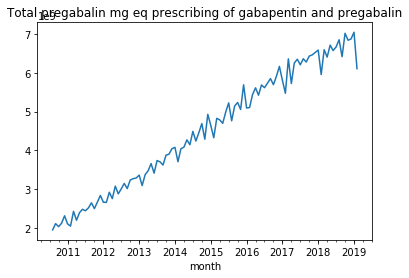

In [3]:
#Merge data into single dataframe
gaba_sum_df=gaba_df.groupby(["month", "pct"])['pregab_mg'].sum().to_frame(name = 'pregab_mg').reset_index()

#plot data on graph
gaba_df.groupby(["month"])['pregab_mg'].sum().plot(kind='line', title="Total pregabalin mg eq prescribing of gabapentin and pregabalin")

This shows a significant, and linear increase, over the last 8 years.  

## Modelling for measure

In [4]:
# get data for patient list size (all patients)
sql2 = """
SELECT month, pct_id AS pct, sum(total_list_size) as list_size
FROM ebmdatalab.hscic.practice_statistics
group by 
month, pct
order by
month, pct
"""
listsize_df = bq.cached_read(sql2, csv_path='list_size.csv')
listsize_df['month'] = listsize_df['month'].astype('datetime64[ns]')

In [5]:
#merge dataframes
per_1000_df = pd.merge(gaba_sum_df, listsize_df, on=['month', 'pct'])
per_1000_df['mg_per_1000'] = 1000* (per_1000_df['pregab_mg']/per_1000_df['list_size'])

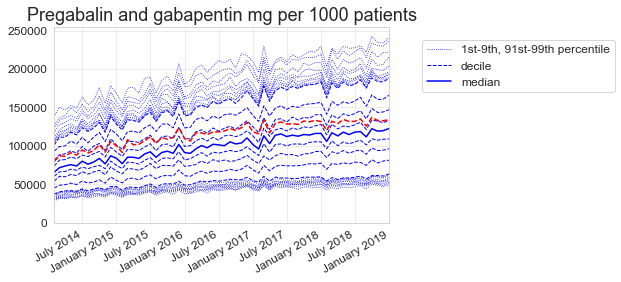

In [6]:
#create sample deciles
charts.deciles_chart(
        per_1000_df,
        period_column='month',
        column='mg_per_1000',
        title="Pregabalin and gabapentin mg per 1000 patients",
        show_outer_percentiles=True)

#add in example CCG (NEW Devon - 99P)
df_subject = per_1000_df.loc[per_1000_df['pct'] == '99P']
plt.plot(df_subject['month'], df_subject['mg_per_1000'], 'r--')
plt.show()

There is significant use in some CCGs, along with significant variation.

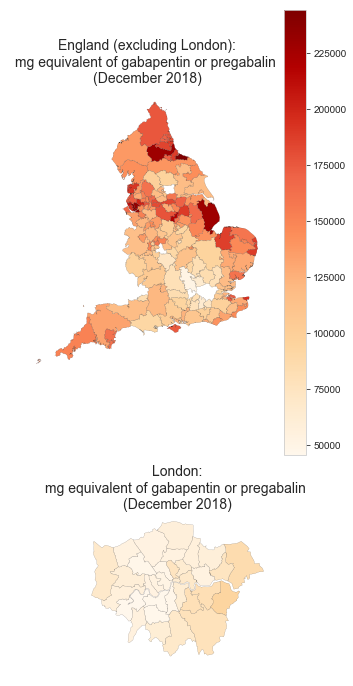

In [7]:
#create choropeth map of 1kcal/ml per 1000 patients
latest_per_1000_df = per_1000_df.loc[per_1000_df['month'] == '2018-12-01']
plt = maps.ccg_map(latest_per_1000_df, title="mg equivalent of gabapentin or pregabalin \n(December 2018)", column='mg_per_1000', cartogram=False, separate_london=True)
plt.show()